# Heat Equation - FEniCS - Gaussian Kernel Diffusion

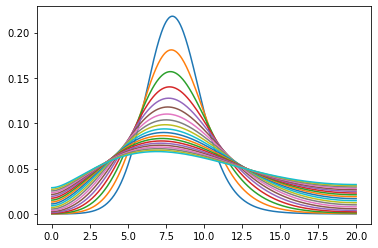

In [186]:
from fenics import *
import numpy as np
import matplotlib.pyplot as plt

L = 10          # final L
num_steps = 20    # number of length steps
dl = L / num_steps # length step size
theta = 5 #Lloc constant term


# Create mesh and define function space
nx = 400
mesh = IntervalMesh(nx, 0, 20.)
V = FunctionSpace(mesh, 'P', 3)

x = SpatialCoordinate(mesh)

# Define boundary condition
u_D = Expression('exp(-(pow((x[0]-8),2)/4))/(sqrt(2*pi*4))', degree=3, l=0)
# plot(u_D)

def right(x, on_boundary):
    return near(x[0], 10.)
def left(x, on_boundary):
    return near(x[0], 0.)

bc = DirichletBC(V, Constant(0), right)

# Define initial value
u_n = interpolate(u_D, V)
C = assemble(u_n*dx)
u_n.assign(u_n/C)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)

a_form = (u*v+(dl/theta)*(x[0]+1)*u.dx(0)*v.dx(0))*dx
L_form = u_n*v*dx

# Time-stepping
u = Function(V)
l = 0
vtkfile = File('fokker_plank/solution.pvd')
for n in range(num_steps):

    # Update current time
    l += dl

    # Compute solution
    solve(a_form == L_form, u)

    # Plot solution
    plot(u)
    vtkfile << (u, l)

    # Update previous solution
    u_n.assign(u)
    #print(assemble(u*dx))

# Hold plot
plt.show()